In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import uproot

import sys
sys.path.append('../')
from CAFdata import *
import helpers
from datetime import date

%load_ext autoreload
%autoreload 2

In [4]:
day = date.today().strftime("%Y_%m_%d")
DATA_DIR = f'/sbnd/data/users/brindenc/analyze_sbnd/nue/states/2022A/2023_1_23'
FNAME = 'cut_events.root'

In [50]:
events_tree = uproot.open(f'{DATA_DIR}/{FNAME}:rectree;1')
#events = helpers.get_df(events_tree,events_tree.keys())
events = events_tree.arrays(library='pd')
events = events[0]

In [52]:
events.set_index(['run','subrun','evt'])

nshw  ntrk  truenshw  truentrk  nstub  nslc  nele  \
run subrun evt                                                      
327 12     37      0     2         0         2      3    11     0   
           236     1     1         1         1      2     9     0   
324 98     409     0     1         0         1      1     6     0   
304 90     308     2     3         2         3      4     8     0   
339 12     145     2     1         2         1      4     5     0   
316 73     193     3     2         3         2      6     6     0   
321 83     191     2     1         2         1      0     8     0   
           363     2     6         2         6      4     8     0   
           370     0     2         0         2      0     5     0   
336 86     8       0     2         0         2      0     8     0   
323 6      31      1     2         1         2      1     8     0   
338 98     23      0     1         0         1      1     5     0   
316 76     195     0     1         0         1      3    12     0   
           441     0     3         0         3      4     5     0   
325 84     271     0     1         0         1      1     8     0   
           397     1     2         1         2      2     4     0   
305 64     123     1     2         1         2      2    13     0   
           153     0     1         0         1      0    10     0   
341 64     266     0     2         0         2      2     8     0   
           309     0     7         0         7      5     4     0   
321 14     471     0     3         0         3      1    15     0   
323 88     248     1     1         1         1      3    11     0   
291 23     25      0     1         0         1      1    10     0   
281 69     317     1     1         1         1      1     5     0   
210 7      20      1     4         1         4      5     5     0   
207 19     568     0     2         0         2      2     8     0   
228 81     366     5     1         5         1      1     5     0   
209 50     291     1     2         1         2      2     8     0   
           306     1     2         1         2     13     9     0   
263 50     19      1     3         1         3      1     8     0   
216 35     83      0     2         0         2      0     6     0   
           249     1     3         1         3      1     9     0   
206 10     344     1     1         1         1      2    10     0   
214 44     412     2     2         2         2      4     6     0   
236 69     228     0     3         0         3      0     9     0   
291 90     384     3     1         3         1      0    10     0   
           448     1     3         1         3      1     8     0   
209 86     59      0     2         0         2      1     9     0   
           129     1     2         1         2      2     9     0   
266 35     212     0     3         0         3      3     8     0   
295 54     29      1     1         1         1      1     9     0   
           34      3     3         3         3      5     9     0   
           111     2     3         2         3      4     5     0   
           538     3     2         3         2      2     9     0   
    96     536     1     2         1         2      1    16     0   
206 7      212     3     2         3         2      1    10     0   
215 42     174     1     2         1         2      2     8     0   
           481     0     2         0         2      5     4     0   

                razzle.electrons  razzle.photons    Etheta  ...   lshw.len  \
run subrun evt                                              ...              
327 12     37                  0               0  0.003175  ...  -1.000000   
           236                 0               0  0.002858  ...   3.136191   
324 98     409                 0               0  0.000210  ...  -1.000000   
304 90     308                 1               1  0.000133  ...  35.463921   
339 12     145                 1               0  0.003345  ...  25.943443   
316 73     193     

In [53]:
def set_event_type(events):
  events.loc[events.loc[:,'evt_type'] == 0,'evt_type'] = 'NuEScat'
  events.loc[events.loc[:,'evt_type'] == 1,'evt_type'] = 'NCPi0'
  events.loc[events.loc[:,'evt_type'] == 2,'evt_type'] = 'NC'
  events.loc[events.loc[:,'evt_type'] == 3,'evt_type'] ='CCNuMu'
  events.loc[events.loc[:,'evt_type'] == 4,'evt_type'] = 'CCNuE'
  events.loc[events.loc[:,'evt_type'] == 5,'evt_type'] = 'Dirt'
  events.loc[events.loc[:,'evt_type'] == 6,'evt_type'] ='Other'
  return events

In [54]:
#events.loc[:,'evt_type'] = 0 #temp dumby value
#events = events[0].set_index(['run','subrun','evt'])
events = set_event_type(events)
#events.loc[:,'evt_type']

In [55]:
import seaborn as sns

lshw_keys = [key for key in events.keys() if key[:5] == 'lshw.']
lshw_keys.extend(['evt_type'])
slshw_keys = [key for key in events.keys() if key[:6] == 'slshw.']
slshw_keys.extend(['evt_type'])

lshw = events.loc[:,lshw_keys]
slshw = events.loc[:,slshw_keys]

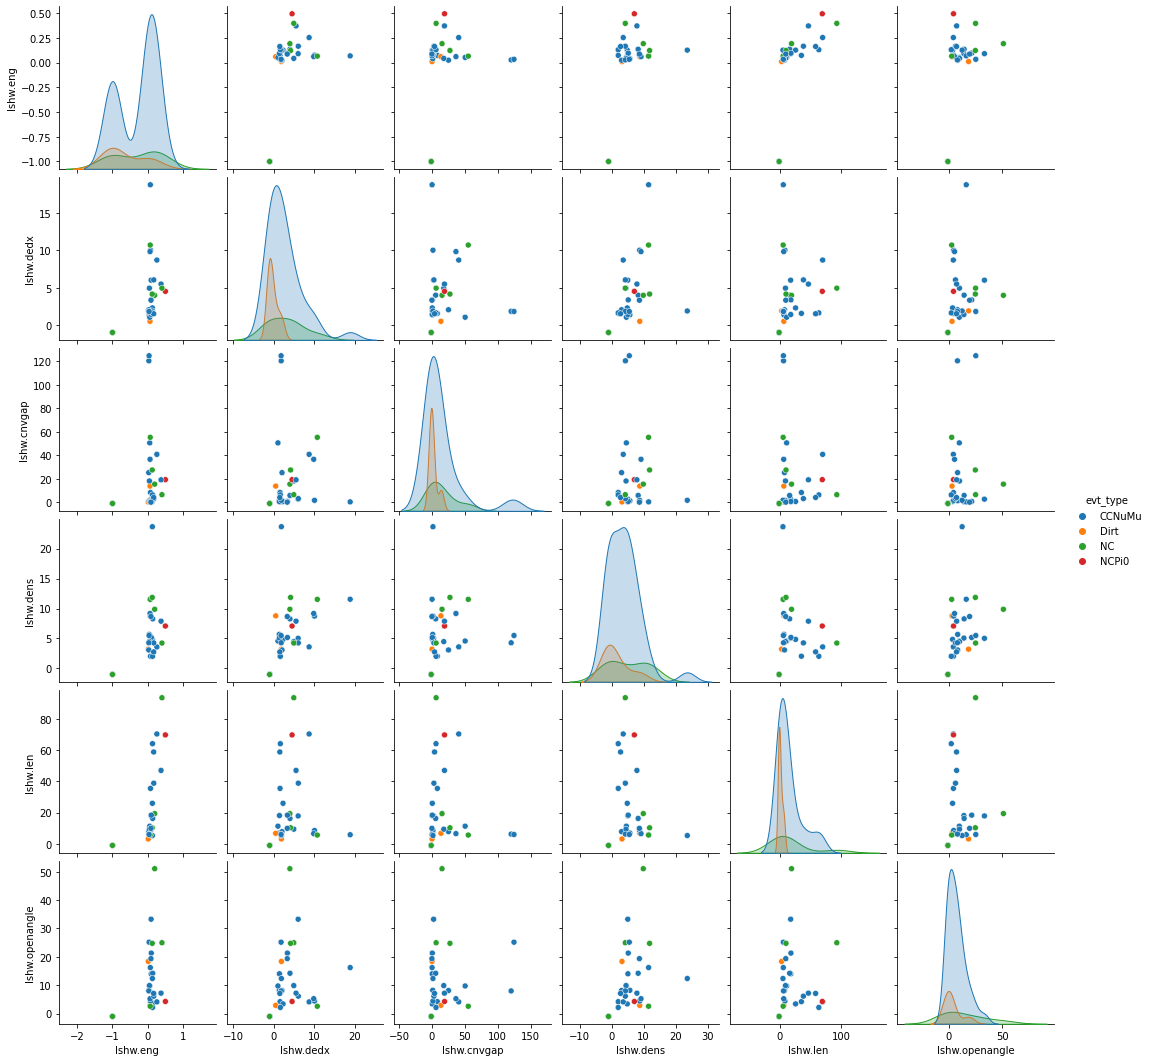

In [56]:
sns.pairplot(lshw,hue='evt_type')

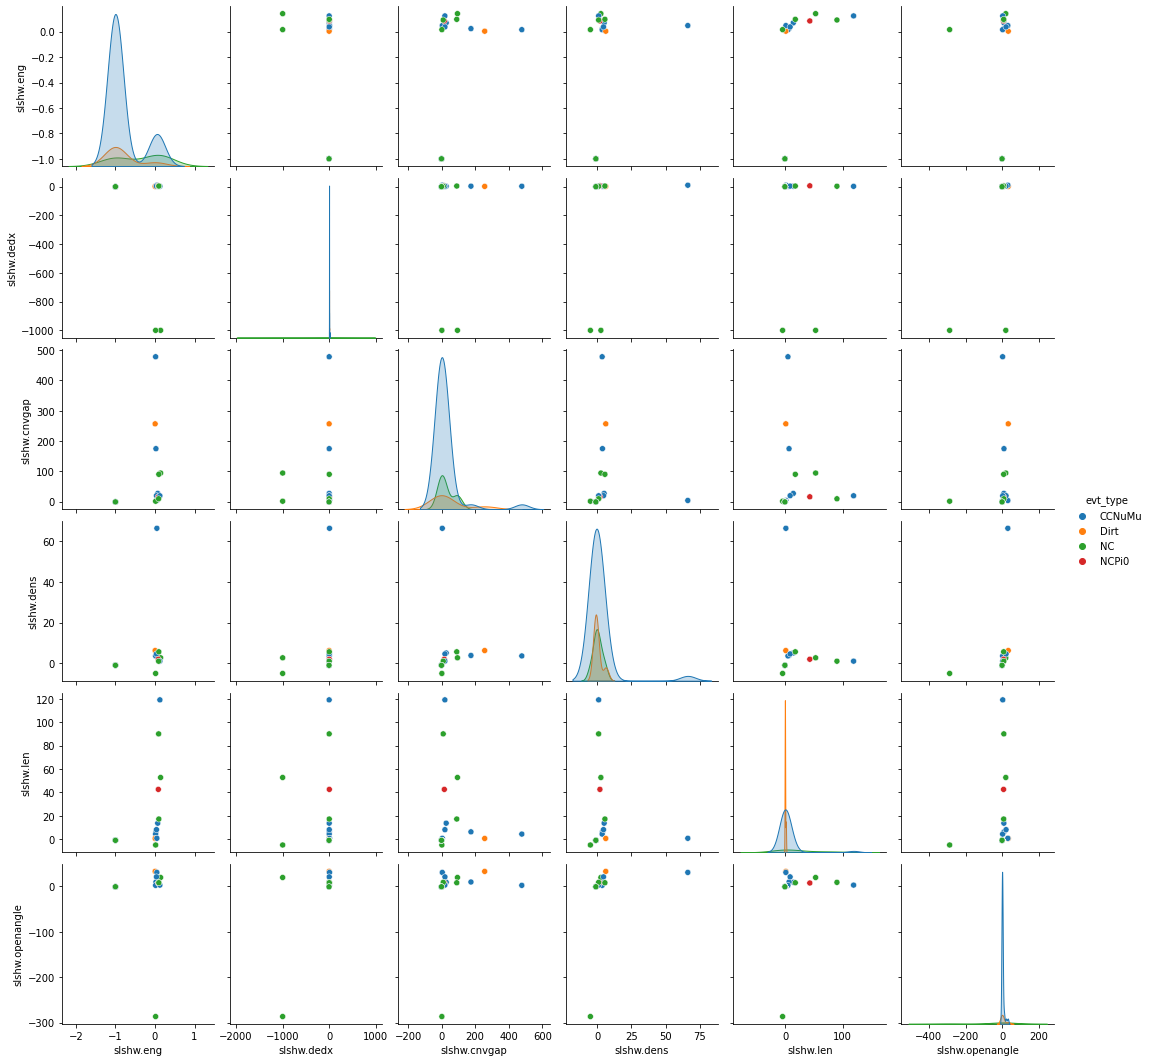

In [58]:
sns.pairplot(slshw,hue='evt_type')

In [27]:
938.15 +31.55 +27.73 +16.00 +8.22 +17.51

1039.16

In [27]:
import random

def get_random_univ(M,sys):
  """
  \description: get random universe for bin counts N by randomly
  varying within systematic and statistical uncertainties
  \param: M - Montecarlo events
  """
  N = M.copy() #Copy M, make it "data-like"
  for i,bin_content in enumerate(N):
    bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],sys[i])
    #bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],1/np.sqrt(N[i])) #stat
    N[i] = bin_content
  return N

In [1]:
M = np.array([48.7,14.4,20.5,18.1,11.9,21.6])
sys = np.array([9.9,5.2,6.3,5.9,4.3,7.7])
stat = 1/np.sqrt(M)
stat,sys/M

NameError: name 'np' is not defined

In [29]:
n = get_random_univ(M,sys)
n,M

(array([99.66613784, 29.76563564,  3.84779541, -0.27023862, -6.36743604,
        28.32301494]),
 array([48.7, 14.4, 20.5, 18.1, 11.9, 21.6]))